# Data Preprocessing

### Importing Libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics

### Importing Dataset

In [21]:
dataset = pd.read_csv("car data.csv")
dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [38]:
dataset.shape

(301, 8)

### Checking for Missing Values

In [22]:
dataset.isnull().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

Dropping Car_name column form dataset

In [23]:
dataset.drop('Car_Name', axis = 1, inplace = True)

In [24]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [25]:
# Now i want to see have much old old is the car for that i will make some chnages in dataset.
# i will add one feature into dataset that Current_Year

In [26]:
dataset['Current_Year'] = 2020

In [27]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [28]:
# now i will add other feature that is No_Year_old

dataset['No_Year_Old'] = dataset['Current_Year'] - dataset['Year']

# it will subtract Year from Current_Year

In [29]:
dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_Year_Old
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [30]:
# now you can see that No_Year_Old has been addded to our dataset. now i will delete Year and Current_Year features from dataset

In [32]:
dataset.drop(['Year','Current_Year'], axis = 1, inplace = True)

In [33]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_Year_Old
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


### Converting Categorical Values Into Numerical

In [34]:
# As you see that there are 3 features having categorical values so we will convert it into numerical values

In [35]:
print(dataset['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [36]:
print(dataset['Seller_Type'].unique())

['Dealer' 'Individual']


In [37]:
print(dataset['Transmission'].unique())

['Manual' 'Automatic']


In [39]:
#now by using dummies function we will convert it into numerical values
dataset = pd.get_dummies(dataset, drop_first=True) #after converting it we will drop first column of dummies.

In [40]:
dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


### Now We Will See the Correlation in the Dataset

In [41]:
dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_Year_Old,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_Year_Old,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


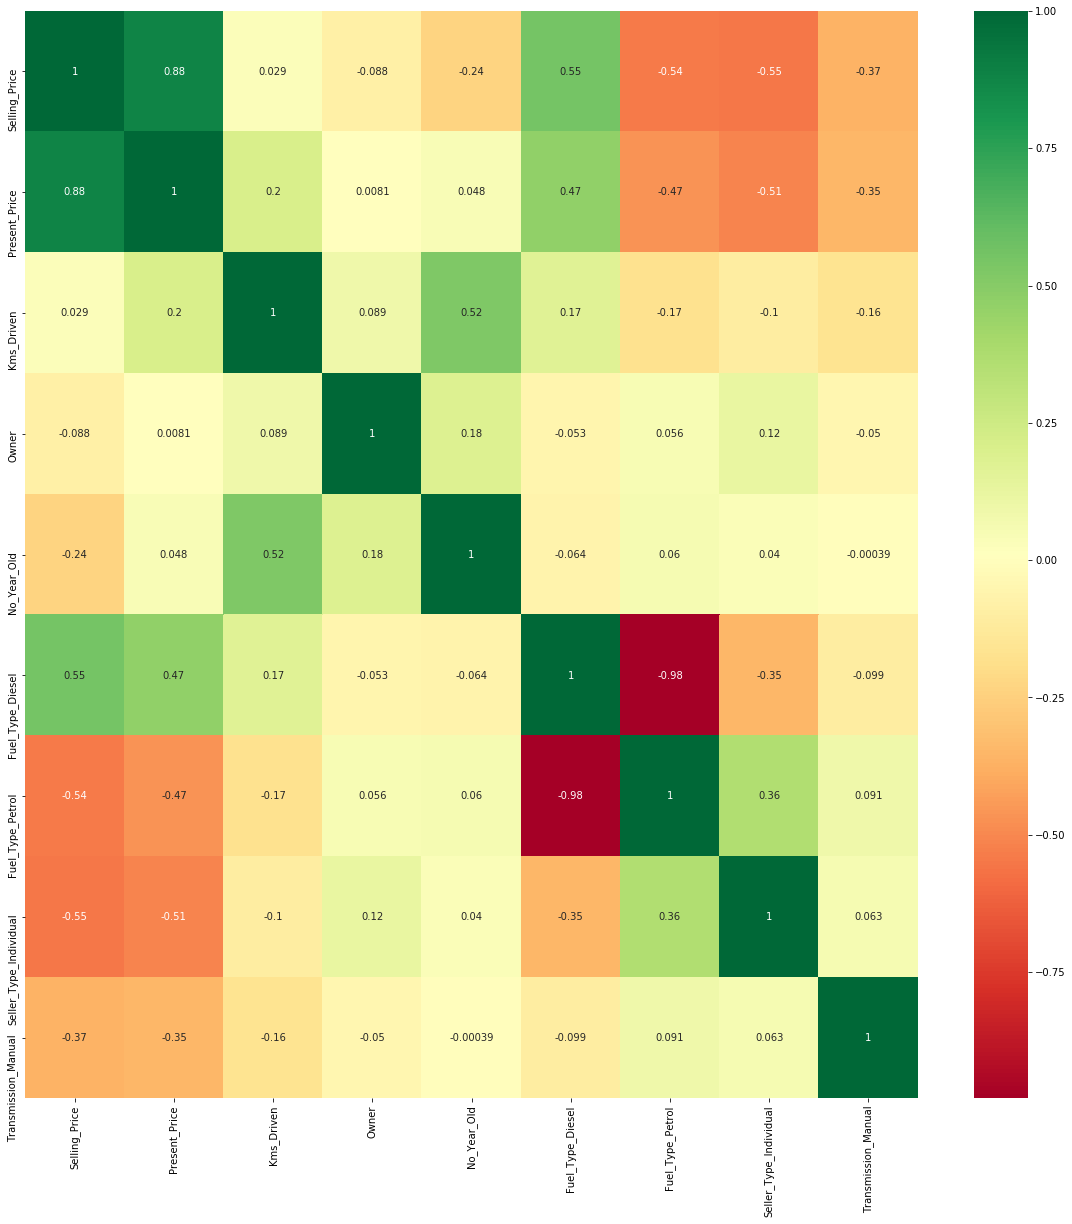

In [43]:
corrmat = dataset.corr() 
top_corr_features = corrmat.index 
plt.figure(figsize=(20,20)) 
#plot heat map 
g=sns.heatmap(dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Splitting Dataset into Independent and Dependent Features

In [45]:
X = dataset.iloc[:,1:].values

In [46]:
y = dataset.iloc[:,0].values

In [47]:
X

array([[5.5900e+00, 2.7000e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.5400e+00, 4.3000e+04, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [9.8500e+00, 6.9000e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       ...,
       [1.1000e+01, 8.7934e+04, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00],
       [1.2500e+01, 9.0000e+03, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00],
       [5.9000e+00, 5.4640e+03, 0.0000e+00, ..., 1.0000e+00, 0.0000e+00,
        1.0000e+00]])

In [48]:
y

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  2.85,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  7.25,  7.75,
        3.25,  2.65,  2.85,  4.9 ,  4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,
        6.  ,  1.95,  7.45,  3.1 ,  2.35,  4.95,  6.  ,  5.5 ,  2.95,
        4.65,  0.35,  3.  ,  2.25,  5.85,  2.55,  1.95,  5.5 ,  1.25,
        7.5 ,  2.65,  1.05,  5.8 ,  7.75, 14.9 , 23.  , 18.  , 16.  ,
        2.75,  3.6 ,  4.5 ,  4.75,  4.1 , 19.99,  6.95,  4.5 , 18.75,
       23.5 , 33.  ,  4.75, 19.75,  9.25,  4.35, 14.25,  3.95,  4.5 ,
        7.45,  2.65,  4.9 ,  3.95,  5.5 ,  1.5 ,  5.25, 14.5 , 14.73,
        4.75, 23.  , 12.5 ,  3.49,  2.5 , 35.  ,  5.9 ,  3.45,  4.75,
        3.8 , 11.25,  3.51, 23.  ,  4.  ,  5.85, 20.75, 17.  ,  7.05,
        9.65,  1.75,  1.7 ,  1.65,  1.45,  1.35,  1.35,  1.35,  1.25,
        1.2 ,  1.2 ,  1.2 ,  1.15,  1.15,  1.15,  1.15,  1.11,  1.1 ,
        1.1 ,  1.1 ,  1.05,  1.05,  1.05,  1.05,  1.  ,  0.95,  0.9 ,
        0.9 ,  0.75,

### Features Importance

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [50]:
print(model.feature_importances_)

[0.38404659 0.04036225 0.00090532 0.07443099 0.2232513  0.01486952
 0.11241241 0.14972163]


In [51]:
# from the you can see that which are the features are importent. which has higher value that is most importent

### Splitting Dataset into Train and Test

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [54]:
X_train.shape

(240, 8)

In [55]:
X_test.shape

(61, 8)

In [56]:
y_train.shape

(240,)

In [57]:
y_test.shape

(61,)

# Model Training

# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

### Hyperparameters

In [61]:
# Numnber of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
print(n_estimators)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
print(max_features)
# Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
print(max_depth)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
print(min_samples_split)
# Minimum number of sample required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
print(min_samples_leaf)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
['auto', 'sqrt']
[5, 10, 15, 20, 25, 30]
[2, 5, 10, 15, 100]
[1, 2, 5, 10]


In [63]:
from sklearn.model_selection import RandomizedSearchCV   # RandomizedSearchCV is used to find out the best parameters outof above
                                                        # we can also use GridSearchCV but RandomizedSearchCV is faster.

In [64]:
# create the random grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


It will select best parameter from the above

### Model Building

In [65]:
# use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [66]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [67]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   1.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   42.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [68]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [69]:
y_pred=rf_random.predict(X_test)

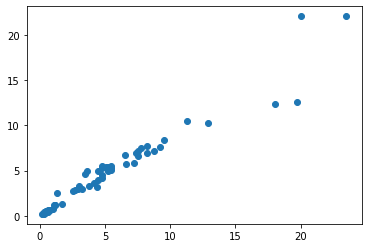

In [70]:
plt.scatter(y_test,y_pred)

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test,y_pred)

0.9228962578603017

In [73]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)